В обработке сигналов может пригодиться библиотека `scipy`. По ссылке можно ознакомиться с документацией и со списком модулей, входящих в библиотеку:  
https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide

Модуль `scipy.fft` содержит функции, относящиеся к преобразованию Фурье. Нарисуем спектр Фурье для суммы двух синусоид (пример из документации `scipy`). Нам понадобится собственно функция `fft`, которая вычисляет быстрое преобразование Фурье для дискретного сигнала, и функция `fftfreq`, которая возвращает значения частоты (в Герцах), которые мы будем откладывать по оси X на спектрограмме.

In [4]:
from scipy.fft import fft, fftfreq
import numpy as np

# Количество отсчётов в сигнале
N = 600

# Период дискретизации (в секундах)
T = 1.0 / 800.0

# Заведём массив временных точек (N отсчётов с промежутком T)
x = np.linspace(0.0, N*T, N, endpoint=False)
# Построим наш сигнал как сумму двух синусоид с частотами 50 и 80 Гц
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

Посмотрим отдельно на полученные массивы:

In [ ]:
# это значения времени каждого отсчёта сигнала
print(x[:20])

In [ ]:
# это значения амплитуды каждого отсчёта сигнала
print(y[:20])

Нарисуем наш сигнал на графике:

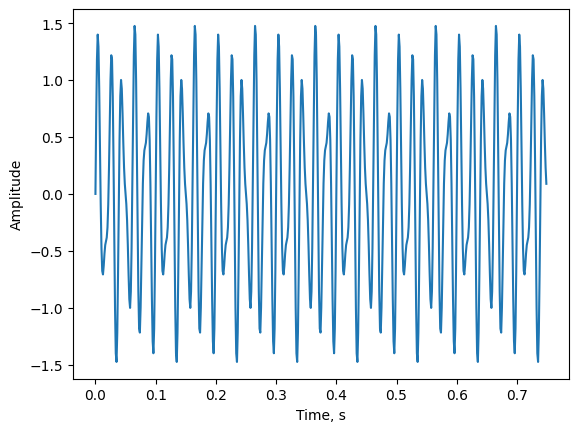

In [5]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.show()

Займёмся вычислением спектра:

In [ ]:
# Вычислим преобразование Фурье
yf = fft(y)
# Получим список частот (в Гц)
xf = fftfreq(N, T)[:N//2]

Посмотрим, что получилось:

In [ ]:
# Это то, что мы будем откладывать по оси X на спектре (значения частот):
print(xf[:20])

In [ ]:
# А это значения спектра в каждой частоте:
print(yf[:20])

Обратите внимание, что значения спектра &ndash; это комплексные числа!

Нарисуем спектр на графике:

In [ ]:
# Во-первых, возьмём модуль от нашего спектра, чтобы получить вещественные числа
# Во-вторых, возьмём только левую половинку (т.к. спектр получается симметричным)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlabel("Frequency, Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Чтобы краевые эффекты не вносили искажения в спектр, полезно умножить значения в сигнале на какую-нибудь оконную функцию. Для этого в модуле `scipy.signal` есть пространство имён `windows` и функция `get_window`. Со списком окон можно ознакомиться в документации:  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html

Например, получим окно Ханна под наш сигнал:

In [ ]:
from scipy import signal
hann_window = signal.get_window("hann", N)
plt.plot(x, hann_window)
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.show()

Мы можем просто умножить сигнал на окно:

In [ ]:
y_windowed = y * hann_window
plt.plot(x, y_windowed)
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.show()

Заново вычислим преобразование Фурье:

In [ ]:
yf_windowed = fft(y_windowed)
plt.plot(xf, 2.0/N * np.abs(yf_windowed[0:N//2]))
plt.xlabel("Frequency, Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

**Задание для выполнения в классе**: прочитайте файл cta0001.wav с помощью `scipy.io.wavfile` и нарисуйте на графике спектр Фурье фрагмента сигнала, который начинается с 200 мс и длится 30 мс. Используйте любую оконную функцию.

In [ ]:
!wget https://pkholyavin.github.io/mastersprogramming/cta0001.wav

Другие полезности `scipy`:

`scipy.spatial`: пространственные алгоритмы. Здесь вы можете, например, получить расстояние между двумя векторами по разным метрикам.

In [1]:
a, b, c = [0, 1], [1, 0], [1, 1]

In [ ]:
from scipy.spatial import distance
distance.euclidean(a, b)  # Евклидово расстояние

In [ ]:
distance.cosine(a, b)  # Косинусное расстояние

Замечание: часто пользуются понятием косинусной близости. Чтобы из косинусного расстояния получить косинусную близость, надо его вычесть из единицы.

In [ ]:
1 - distance.cosine(a, b) # Косинусная близость

Матрица (Евклидовых) расстояний:

In [ ]:
from scipy.spatial import distance_matrix
dm = distance_matrix([a, b, c], [a, b, c])
print(dm)

Визуализируем матрицу с помощью функции `imshow` (такой график называется <a href="https://en.wikipedia.org/wiki/Heat_map">heatmap</a>, т.е. тепловой картой):

In [ ]:
plt.imshow(dm)
plt.xticks(range(len(dm)), ["a", "b", "c"])
plt.yticks(range(len(dm)), ["a", "b", "c"])
plt.show()

Подпишем в каждой клетке тепловой карты её значение:

In [ ]:
plt.imshow(dm)
plt.xticks(range(len(dm)), ["a", "b", "c"])
plt.yticks(range(len(dm)), ["a", "b", "c"])
for i in range(len(dm)):
    for j in range(len(dm)):
        plt.text(i, j, f"{dm[i][j]:.3f}", ha="center", va="center", color="w", size=15)
plt.show()

Более подробное руководство по созданию аннотированных тепловых карт можно найти здесь:  
https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

`scipy.interpolate`: интерполяция сигналов. Линейная интерполяция (модифицированный пример из документации `scipy`):

In [33]:
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.0)

In [34]:
xnew = np.linspace(0, 10, num=1001)
ynew = np.interp(xnew, x, y)

In [ ]:
plt.plot(xnew, np.cos(-xnew**2 / 9.0), '-', color="gray", label="original data")
plt.plot(xnew, ynew, '-', label='linear interpolation')
plt.plot(x, y, 'o', label='sampled data')
plt.legend(loc='best')
plt.show()

Интерполяция кубическими сплайнами:

In [36]:
from scipy.interpolate import CubicSpline
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.0)
spl = CubicSpline(x, y)

Мы получили объект класса `CubicSpline`, который можем вызывать как функцию. Аргументом этой функции могут быть как числа (тогда на выходе мы получим значение интерполированного сигнала в этой точке), так и массивы чисел (тогда, соответственно, мы получим массив интерполированных значений).

In [ ]:
xnew = np.linspace(0, 10, num=1001)
plt.plot(xnew, np.cos(-xnew**2 / 9.0), '-', color="gray", label="original data")
plt.plot(xnew, spl(xnew), '-', label='cubic spline interpolation')
plt.plot(x, y, 'o', label='sampled data')
plt.legend(loc='best')
plt.show()

**Задание для выполнения в классе**: получите PitchTier для файла cta0001.wav с помощью библиотеки `parselmouth`. Используйте команду "Stylize", чтобы стилизовать контур с точностью 5 Гц, а затем интерполируйте стилизованный контур с помощью кубических сплайнов.  
<img src="https://pkholyavin.github.io/mastersprogramming/stylize.png" width="500">

Ещё одна полезная библиотека для работы со звуком &ndash; `librosa`. Она не ориентирована конкретно для работы с речевыми сигналами, но в ней есть функции для вычисления различных акустических признаков.

https://librosa.org/doc/latest/tutorial.html

Например, вычислим мел-кепстральные коэффициенты:

In [51]:
import librosa
N = 600
fs_sine = 800
T = 1 / fs_sine
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
sine_mfcc = librosa.feature.mfcc(y=y, sr=fs_sine, n_mfcc=13, n_fft=256, hop_length=64)

Параметры функции `mfcc`: https://librosa.org/doc/latest/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

Обработка сигнала окнами:

In [ ]:
librosa.util.frame(np.arange(10), frame_length=3, hop_length=2, axis=0)

**Задание для выполнения в классе**: обработайте сигнал сta0001.wav окнами по 30 мс с шагом 10 мс, на каждом окне вычислите максимум амплитуды. Постройте график.

**Домашнее задание**:

1. Для записи фонетически представительного текста fpt1 посчитать частотность разных аллофонов на уровне "acoustic" в разметке.
2. Вручную выбрать те аллофоны гласных, которые встретились больше 20 раз, для каждого из них вычислить средние значения мел-кепстральных коэффициентов в окне, взятом из середины звука (выберите сами длину окна и количество коэффициентов).
3. Построить матрицу расстояний между ними с помощью функции `scipy.spatial.distance_matrix`
4. Сделать визуализацию